In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import joblib

In [ ]:
df = pd.read_csv('/content/T1.csv')

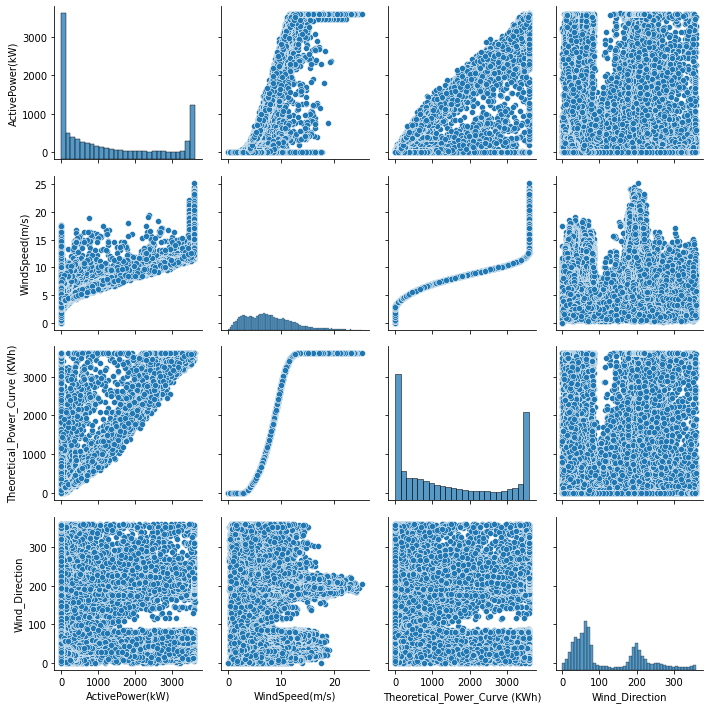

In [ ]:
df.rename(columns={'Date/Time':'Time',
                   'LV ActivePower (kW)':'ActivePower(kW)',
                   "Wind Speed (m/s)":"WindSpeed(m/s)",
                   "Wind Direction (°)":"Wind_Direction"},
                    inplace=True)
sns.pairplot(df)

In [ ]:
corr = df.corr()
plt.figure(figsize=(10, 8))

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

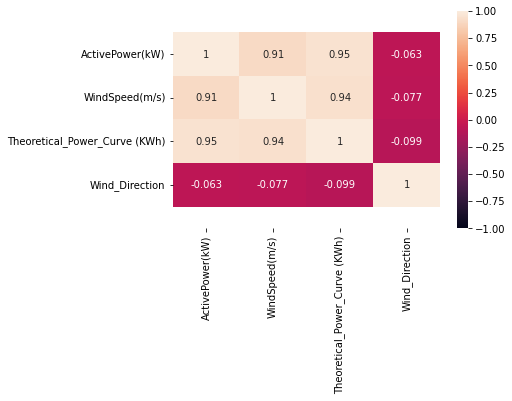

,ActivePower(kW),WindSpeed(m/s),Theoretical_Power_Curve (KWh),Wind_Direction
ActivePower(kW),1.000000,0.912774,0.949918,-0.062702
WindSpeed(m/s),0.912774,1.000000,0.944209,-0.077188
Theoretical_Power_Curve (KWh),0.949918,0.944209,1.000000,-0.099076
Wind_Direction,-0.062702,-0.077188,-0.099076,1.000000


In [ ]:
ax = sns.heatmap(corr, vmin = -1, vmax = 1, annot = True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()
corr

In [ ]:
df["Time"] = pd.to_datetime(df["Time"], format = "%d %m %Y %H:%M", errors = "coerce")
df

,Time,ActivePower(kW),WindSpeed(m/s),Theoretical_Power_Curve (KWh),Wind_Direction
0,2018-01-01 00:00:00,380.047791,5.311336,416.328908,259.994904
1,2018-01-01 00:10:00,453.769196,5.672167,519.917511,268.641113
2,2018-01-01 00:20:00,306.376587,5.216037,390.900016,272.564789
3,2018-01-01 00:30:00,419.645905,5.659674,516.127569,271.258087
4,2018-01-01 00:40:00,380.650696,5.577941,491.702972,265.674286
...,...,...,...,...,...
50525,2018-12-31 23:10:00,2963.980957,11.404030,3397.190793,80.502724
50526,2018-12-31 23:20:00,1684.353027,7.332648,1173.055771,84.062599
50527,2018-12-31 23:30:00,2201.106934,8.435358,1788.284755,84.742500
50528,2018-12-31 23:40:00,2515.694092,9.421366,2418.382503,84.297913


In [ ]:
y = df['ActivePower(kW)'] #'Theoretical_Power_Curve (KWh)'
X = df[['Theoretical_Power_Curve (KWh)','WindSpeed(m/s)']]#'ActivePower(kW)'

In [ ]:
from sklearn.model_selection import train_test_split
train_X, val_X, train_y, val_y = train_test_split(X, y,random_state = 0)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error,r2_score

In [ ]:
forest_model = RandomForestRegressor(max_leaf_nodes =500, random_state=1)
forest_model.fit(train_X, train_y)

RandomForestRegressor(max_leaf_nodes=500, random_state=1)

In [ ]:
power_preds = forest_model.predict(val_X)
print(mean_absolute_error(val_y, power_preds))
print(r2_score(val_y,power_preds))

162.90876721041636
0.9015207981707474
